# QNN for Binary Classification of MNIST Data
### 3.3 QNN_MNIST
### James Saslow
### 4/29/2024

_____________________________________________________________________________________________________________________________


This Jupyter Notebook accomplishes the following tasks

- Imports *MNIST_dataset.csv* and partitions dataset into training and testing data
- Trains parameters on Quantum Neural Network model to perform binary classification
- Trains parameters on Perceptron Neural Network to perform binary classification
    

In [2]:
# Importing Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import plot_model


from qiskit.circuit import Parameter
from qiskit.quantum_info import Operator
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import UnitaryGate
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, qpy

# Custom Packages
import Qfuncs5 as qf                                    # My own custom Qiskit Package
from QuantumNeuralNetwork import QuantumNeuralNetwork   # Custom Made QNN Trainer for our PQC
from NeuralNetScore import nn_confusion                 # Generate confusion matrix for neural net binary classifier


# Setting a Random Seed for Reproducability of Results
np.random.seed(51)

# Importing 'MNIST_dataset.csv'

Here, we use pandas to import the 'MNIST_dataset.csv' file.

We then gather the 'PCA_0', and 'PCA_1' as our two feature variables $x_{0}$, $x_{1}$, and extract their associated class labels by calling the 'binary targets' column.

Next, we split the dataset such that the first 10,000 of the data is training data and the remaining 4,780 samples are testing data.

In [3]:
# Importing 'iris_dataset.csv'
df = pd.read_csv('MNIST_dataset.csv')


df

,PCA_0,PCA_1,targets
0,0.073918,0.143390,0
1,-0.335466,-0.460649,1
2,-0.490993,-0.074950,1
3,-0.486791,0.233593,1
4,-0.452474,0.409029,1
...,...,...,...
14775,-0.511952,-0.153286,1
14776,-0.255648,0.597400,1
14777,-0.471805,-0.003353,1
14778,-0.492540,-0.214135,1


In [4]:
# Partitioning Dataset into Training and Testing Data

X = df[["PCA_0", "PCA_1"]].values
targets = df["targets"].values

# Partitioning Training Data
x_train = X[:10_000]
binary_targets_train = targets[:10_000]

# Partitioning Testing Data
x_test = X[10_000:]
binary_targets_test = targets[10_000:]

In [5]:
# Preparing Training Instances for Incremental Learning


# Mini Batch - B0
x_train_mini = x_train[:200]
binary_targets_train_mini = binary_targets_train[:200]

# Mini Batch -B1
x_train_small = x_train[:600]
binary_targets_train_small = binary_targets_train[:600]

# Mini Batch - B2
x_train_medium = x_train[:1500]
binary_targets_train_medium = binary_targets_train[:1500]


# Loading in Parameterized Quantum Circuit and Training the Quantum Neural Network

Here, we load in our parameterized quantum circuit file 'parameterized_qc.qpy' and read it as a Qiskit *QuantumCircuit* class and draw the circuit to confirm that the PQC loaded in without any errors.

Next, we define QNN as a QuantumNeuralNetwork class, specify the number of epochs and learning rate, then use QuantumNeuralNetwork.train() to train the model parameters and assess model performance.

After, we can use QuantumNeuralNetwork.get() to retrieve the updated model parameters, QuantumNeuralNetwork.confusion_matrix() to assess model error, and QuantumNeuralNetwork.learning_graph() to plot the objective function as a function of epoch.

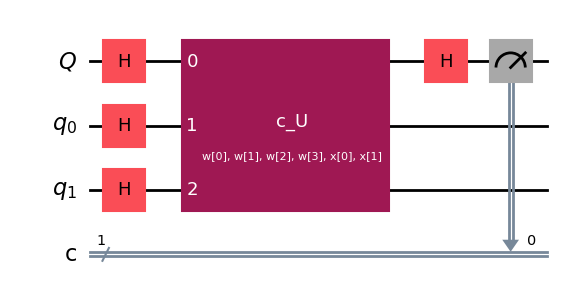

In [6]:
# Loading in the PQC
with open("parameterized_qc.qpy", "rb") as qpy_file_read:
    qc = qpy.load(qpy_file_read)[0]

qc.draw("mpl")

In [7]:
# Building Quantum Neural Network
# Training on the zeroth mini-batch B0

QNN = QuantumNeuralNetwork(qc,x_train_mini, binary_targets_train_mini, x_test, binary_targets_test, \
epoch = 30, lr = 1)


QNN.train()

Epoch 1
Cost Function :  0.11274481028801005
Model Error   :  29.5 %
omega_vec =  [4.24338015 0.27754765 2.16640755 4.05889858]
 
Epoch 2
Cost Function :  0.11250387093928
Model Error   :  29.5 %
omega_vec =  [4.24096237 0.27415266 2.17578898 4.07126337]
 
Epoch 3
Cost Function :  0.11229156549497002
Model Error   :  29.5 %
omega_vec =  [4.23848933 0.27075362 2.18518794 4.08358928]
 
Epoch 4
Cost Function :  0.11199015511148003
Model Error   :  29.5 %
omega_vec =  [4.23595801 0.26734905 2.19459723 4.09587068]
 
Epoch 5
Cost Function :  0.11170232985637994
Model Error   :  29.5 %
omega_vec =  [4.23337477 0.26394136 2.2040194  4.10810789]
 
Epoch 6
Cost Function :  0.11144144661329995
Model Error   :  29.5 %
omega_vec =  [4.23074287 0.260531   2.2134575  4.1203062 ]
 
Epoch 7
Cost Function :  0.11118793562177003
Model Error   :  29.5 %
omega_vec =  [4.22806256 0.25711913 2.22290876 4.13246324]
 
Epoch 8
Cost Function :  0.11093957699928007
Model Error   :  29.5 %
omega_vec =  [4.22533164

In [8]:
# Training on the first mini-batch B1 using Previously Trained Model

QNN = QuantumNeuralNetwork(qc,x_train_small, binary_targets_train_small, x_test, binary_targets_test, \
epoch = 30, lr = 1, w_vec = QNN.get())


QNN.train()

Epoch 1
Cost Function :  0.11449742999189662
Model Error   :  33.166666666666664 %
omega_vec =  [4.14848263 0.17145399 2.45474352 4.4146457 ]
 
Epoch 2
Cost Function :  0.11409910079898676
Model Error   :  33.0 %
omega_vec =  [4.14335587 0.1646257  2.46554605 4.42860732]
 
Epoch 3
Cost Function :  0.11373647332051671
Model Error   :  33.0 %
omega_vec =  [4.13817421 0.15783161 2.4763821  4.44251152]
 
Epoch 4
Cost Function :  0.11335203890252997
Model Error   :  33.0 %
omega_vec =  [4.13294112 0.15106869 2.48724538 4.45635263]
 
Epoch 5
Cost Function :  0.11295931981828337
Model Error   :  33.0 %
omega_vec =  [4.12765247 0.14433774 2.4981358  4.47013094]
 
Epoch 6
Cost Function :  0.11258275452143005
Model Error   :  33.0 %
omega_vec =  [4.12230695 0.13764028 2.50905573 4.48384805]
 
Epoch 7
Cost Function :  0.11220654573869328
Model Error   :  33.0 %
omega_vec =  [4.11690956 0.13097302 2.52000431 4.49750459]
 
Epoch 8
Cost Function :  0.11182730622455661
Model Error   :  33.0 %
omega_v

In [9]:
# Training on the second mini-batch B2 Using the Previously Trained Model

QNN = QuantumNeuralNetwork(qc, x_train_medium, binary_targets_train_medium, x_test, binary_targets_test, \
epoch = 30, lr = 1, w_vec = QNN.get())


QNN.train()

Epoch 1
Cost Function :  0.10667623056375329
Model Error   :  31.466666666666665 %
omega_vec =  [ 3.97506356 -0.01922991  2.78844382  4.80546979]
 
Epoch 2
Cost Function :  0.10634985647758793
Model Error   :  31.466666666666665 %
omega_vec =  [ 3.97031388 -0.02559067  2.79891056  4.81708479]
 
Epoch 3
Cost Function :  0.10606759562168408
Model Error   :  31.266666666666666 %
omega_vec =  [ 3.96552015 -0.03191449  2.80939286  4.82864486]
 
Epoch 4
Cost Function :  0.10573173087618254
Model Error   :  31.2 %
omega_vec =  [ 3.96068177 -0.03820071  2.81988601  4.84014687]
 
Epoch 5
Cost Function :  0.10544417857080127
Model Error   :  31.0 %
omega_vec =  [ 3.95579823 -0.04444764  2.83039481  4.85159377]
 
Epoch 6
Cost Function :  0.10513360321505047
Model Error   :  30.733333333333334 %
omega_vec =  [ 3.95087222 -0.05065876  2.84091483  4.86298401]
 
Epoch 7
Cost Function :  0.10483397974435865
Model Error   :  30.733333333333334 %
omega_vec =  [ 3.94590213 -0.05683193  2.85144857  4.8743

In [10]:
# Training on the entire training set Using the Previously Trained Model

QNN = QuantumNeuralNetwork(qc, x_train, binary_targets_train, x_test, binary_targets_test, \
epoch = 10, lr = 180, w_vec = QNN.get())

QNN.train()

Epoch 1
Cost Function :  0.07596655902586037
Model Error   :  20.17 %
omega_vec =  [ 2.6997479  -0.6490866   4.71695337  6.30209109]
 
Epoch 2
Cost Function :  0.05694303560955997
Model Error   :  15.47 %
omega_vec =  [ 2.09869126 -0.82959929  5.73197261  6.92560061]
 
Epoch 3
Cost Function :  0.050495766272140453
Model Error   :  13.77 %
omega_vec =  [ 1.78259718 -0.92043547  6.38651813  7.29998602]
 
Epoch 4
Cost Function :  0.04805387577573272
Model Error   :  13.01 %
omega_vec =  [ 1.59953565 -0.95719852  6.80397024  7.49420753]
 
Epoch 5
Cost Function :  0.04721223436317423
Model Error   :  12.52 %
omega_vec =  [ 1.49474665 -0.96493876  7.05464507  7.57023145]
 
Epoch 6
Cost Function :  0.04694679523130307
Model Error   :  12.32 %
omega_vec =  [ 1.43706782 -0.96139221  7.20181831  7.58504501]
 
Epoch 7
Cost Function :  0.04686014650317746
Model Error   :  12.22 %
omega_vec =  [ 1.40614125 -0.95571062  7.28998207  7.57441002]
 
Epoch 8
Cost Function :  0.04682822171547614
Model Err

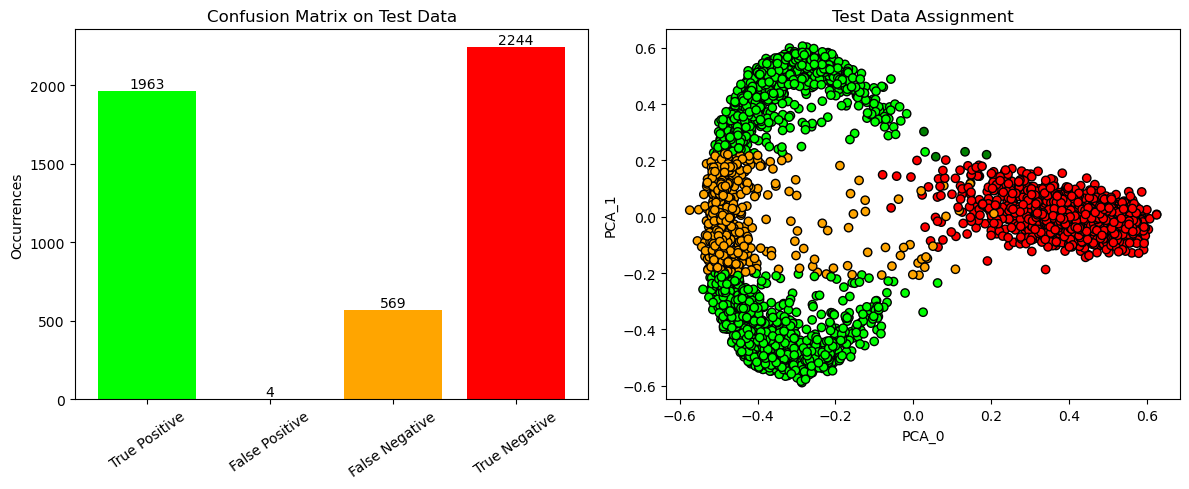

,Accuracy,Precision,True Positive Rate,Specificity,False Positive Rate
metrics,0.880126,0.997966,0.775276,0.998221,0.001779


In [11]:
# Plotting Confusion Matrix Data
QNN.confusion_matrix(xlabel = 'PCA_0', ylabel = 'PCA_1', vertical = False)

# Training Perceptron Neural Network using Tensorflow


Here, we implement a binary classifier via classical machine learning methods. In particular, we employ a perceptron neural network using the Tensorflow package. First, we build our classifier using two input neurons, one output neuron, and a sigmoid activation function. We use 'binary_crossentropy' for our loss function, since it is typically appropriate to use in classification tasks. And, we use stochastic gradient descent as our optimizer. 

In [12]:
# Building Perceptron Neural Network
model = Sequential()
model.add(Dense(units = 2 , activation= 'sigmoid'))
model.add(Dense(units = 1 , activation= 'sigmoid'))

# Specifying loss function and Training Method
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Training CNN
model.fit(x_train, binary_targets_train, epochs=10, batch_size= 1)

Epoch 1/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 615us/step - accuracy: 0.9350 - loss: 0.3803
Epoch 2/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 615us/step - accuracy: 0.9945 - loss: 0.0551
Epoch 3/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 613us/step - accuracy: 0.9953 - loss: 0.0316
Epoch 4/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 638us/step - accuracy: 0.9958 - loss: 0.0217
Epoch 5/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 627us/step - accuracy: 0.9959 - loss: 0.0219
Epoch 6/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 623us/step - accuracy: 0.9959 - loss: 0.0202
Epoch 7/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 623us/step - accuracy: 0.9951 - loss: 0.0193
Epoch 8/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 644us/step - accuracy: 0.9954 - loss: 0.0182
Epoch 9/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 633us/step - accuracy: 0.9940 - loss: 0.0182
Epoch 10/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 632us/step - accuracy: 0.9945 - loss: 0.0170


In [13]:
# Assessing model predictions on test data
model_prediction = model.predict(x_test)


# Printing Model Prediction Output
print(model_prediction)

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step
[[0.9457972 ]
 [0.99884874]
 [0.99689597]
 ...
 [0.9988402 ]
 [0.9989469 ]
 [0.00215005]]


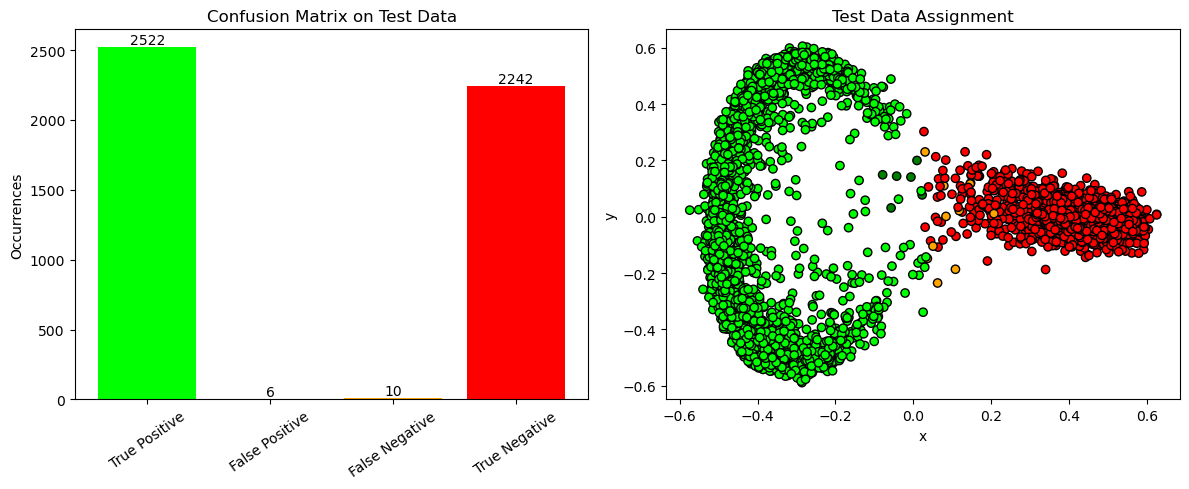

,Accuracy,Precision,True Positive Rate,Specificity,False Positive Rate
metrics,0.996653,0.997627,0.996051,0.997331,0.002669


In [14]:
# Plotting Confusion Matrix Data
nn_confusion(model_prediction, binary_targets_test, x_test)